# 编写自己的函数

In [ ]:
#R中绝大多数即有函数，如 mean(), var(),等是编写人员写在R中的，
#我们自己写函数与此本质上差不多

In [ ]:
#函数定义的格式： name <- function(arg_1, arg_2, 。。。) expression
#expression是R 的表达式， arg_1, arg_2.。。。是参数，
#返回值可以是向量、矩阵（数组）、列表或数据框

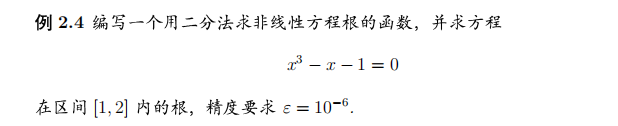
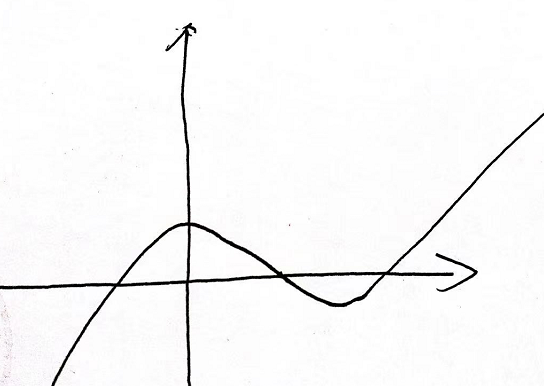
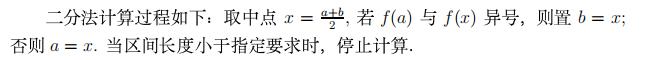

In [1]:

fzero <- function(f,a,b,eps){
    "
参数：
f是求根的函数， a,b是二分法左右端点，
eps=1e-5是精度要求

返回：
当初始区间不满足要求时，返回‘’finding root is fail!’
当满足终止条件时，返回值为方程根的近似值和在近似点处的函数
    "
    if(f(a)*f(b)>0){
        list(fail="finding root is fail!")
    }
    else{
        repeat{
            if(abs(b-a)<eps) break
            x<-(a+b)/2
            if(f(a)*f(x)<0){b<-x}else{a<-x}
        }
        list(root=(a+b)/2, fun=f(x))
    }
}

In [2]:
f <- function(x){
    "
    建立求根的非线性函数
    "
    x^3-x-1
}

In [3]:
fzero(f,1,2,1e-6)

$root
[1] 1.324718

$fun
[1] -1.857576e-06

In [4]:
#比较一下，R中已有的求一元方程根的函数 uniroot
uniroot(f, c(1,2))

$root
[1] 1.324718

$f.root
[1] -5.634261e-07

$iter
[1] 7

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

例2：编写一个独立样本T检验的函数（假设两样本总体方差一致）
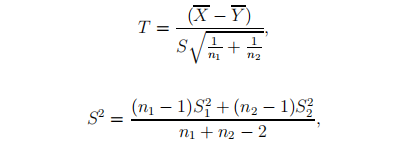
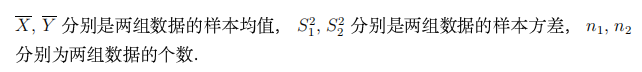

In [5]:
d_t <-function(y1,y2){
    n1 <- length(y1); n2 <-length(y2)
    yb1 <- mean(y1); yb2<-mean(y2)
    s1 <- var(y1); s2 <- var(y2)
    s <- ((n1-1)*s1 + (n2-1)*s2)/(n1+n2-2)
    (yb1-yb2)/sqrt(s*(1/n1 + 1/n2))
}

In [6]:
A <- c(79.98, 80.04, 80.02, 80.04, 80.03, 80.03,
80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02)
B <- c(80.02, 79.94, 79.98, 79.97, 79.97, 80.03,
79.95, 79.97)

In [7]:
d_t(A,B)

[1] 3.472245

例3.R定义二元运算，其形式为 %anything%， 设x,y是两个向量，定义x与y的内积
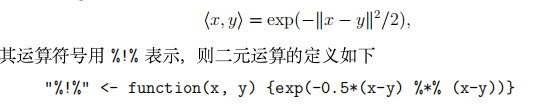

In [8]:
"%!%" <- function(x, y) {exp(-0.5*(x-y) %*% (x-y))}

In [9]:
A <- c(79.98, 80.04, 80.02, 80.04, 80.03, 80.03)
B <- c(80.02, 79.94, 79.98, 79.97, 79.97, 80.03)
A%!%B

0.9892086


In [ ]:
#有名参数

#fzero <- function(f,a,b,eps){
fzero(f,1,2,1e-6)
fzero(f,a=1,b=2,eps=1e-6)
fzero(f,a=1,eps=1e-6,b=2)


In [11]:
#如果定义函数时参数有赋值，使用时刻省缺
fzero <- function(f,a,b,eps=1e-5){
    "
参数：
f是求根的函数， a,b是二分法左右端点，
eps=1e-5是精度要求

返回：
当初始区间不满足要求时，返回‘’finding root is fail!’
当满足终止条件时，返回值为方程根的近似值和在近似点处的函数
    "
    if(f(a)*f(b)>0){
        list(fail="finding root is fail!")
    }
    else{
        repeat{
            if(abs(b-a)<eps) break
            x<-(a+b)/2
            if(f(a)*f(x)<0){b<-x}else{a<-x}
        }
        list(root=(a+b)/2, fun=f(x))
    }
}

fzero(f,1,2,eps=1e-6)

$root
[1] 1.324718

$fun
[1] -1.857576e-06

例4.编写求非线性方程根解的 Newton法方程，并求下面方程组的解
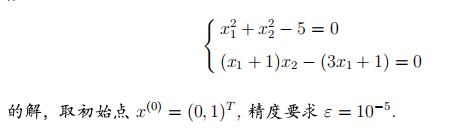
牛顿法：
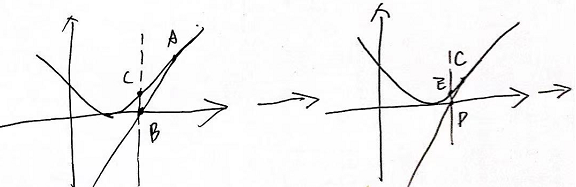
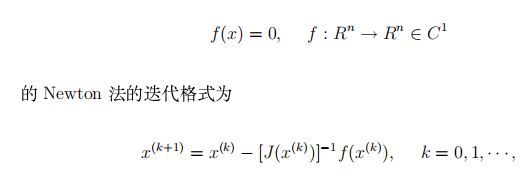
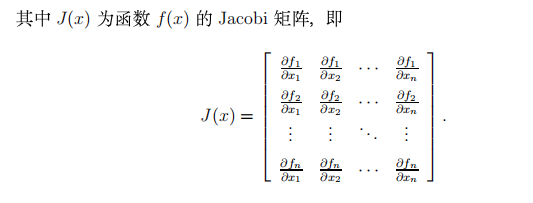

In [12]:
Nt <- function(fun, x, ep=1e-5, it_max=100){
    "
参数：
fun是方程函数
x是初始变量
ex是精度，缺省时为1e-5
it_max是最大迭代,缺省时为100
    "
    index <- 0; k <-1
    while(k<=it_max){
        x1 <- x; obj <-fun(x)
        x <- x - solve(obj$J, obj$f)
        norm <-sqrt((x-x1)%*%(x-x1))
        if(norm<ep){index <-1;break}
        k <- k+1
    }
    obj <- fun(x)
    list(root=x, it=k, index=index, FunVal=obj$f)
}

funs <- function(x){
    
    "
f是所求方程函数，
J是雅克比矩阵
   "
    f <- c(x[1]^2 + x[2]^2-5, (x[1]+1)*x[2]-(3*x[1]+1))
    J <- matrix(c(2*x[1], 2*x[2], x[2]-3, x[1]+1),nrow=2, byrow=T)
    list(f=f,J=J)
}

In [13]:
Nt(funs,c(0,1))

$root
[1] 1 2

$it
[1] 6

$index
[1] 1

$FunVal
[1] 1.598721e-14 6.217249e-15